<a href="https://colab.research.google.com/github/Aditya11620/majorpro/blob/main/phishing_majorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#To read the dataset
data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [ ]:
#To drop unecessary columns
data = data.drop(['Index'],axis = 1)

In [ ]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


In [ ]:
#To display all the columns name
data.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [ ]:
#To display the datatypes of all the columns.
data.dtypes

UsingIP                int64
LongURL                int64
ShortURL               int64
Symbol@                int64
Redirecting//          int64
PrefixSuffix-          int64
SubDomains             int64
HTTPS                  int64
DomainRegLen           int64
Favicon                int64
NonStdPort             int64
HTTPSDomainURL         int64
RequestURL             int64
AnchorURL              int64
LinksInScriptTags      int64
ServerFormHandler      int64
InfoEmail              int64
AbnormalURL            int64
WebsiteForwarding      int64
StatusBarCust          int64
DisableRightClick      int64
UsingPopupWindow       int64
IframeRedirection      int64
AgeofDomain            int64
DNSRecording           int64
WebsiteTraffic         int64
PageRank               int64
GoogleIndex            int64
LinksPointingToPage    int64
StatsReport            int64
class                  int64
dtype: object

In [ ]:
#To display the size of the dataset along with the column size. 
data.shape

(11054, 31)

In [ ]:
#To display the whole dataset
data

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11052,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


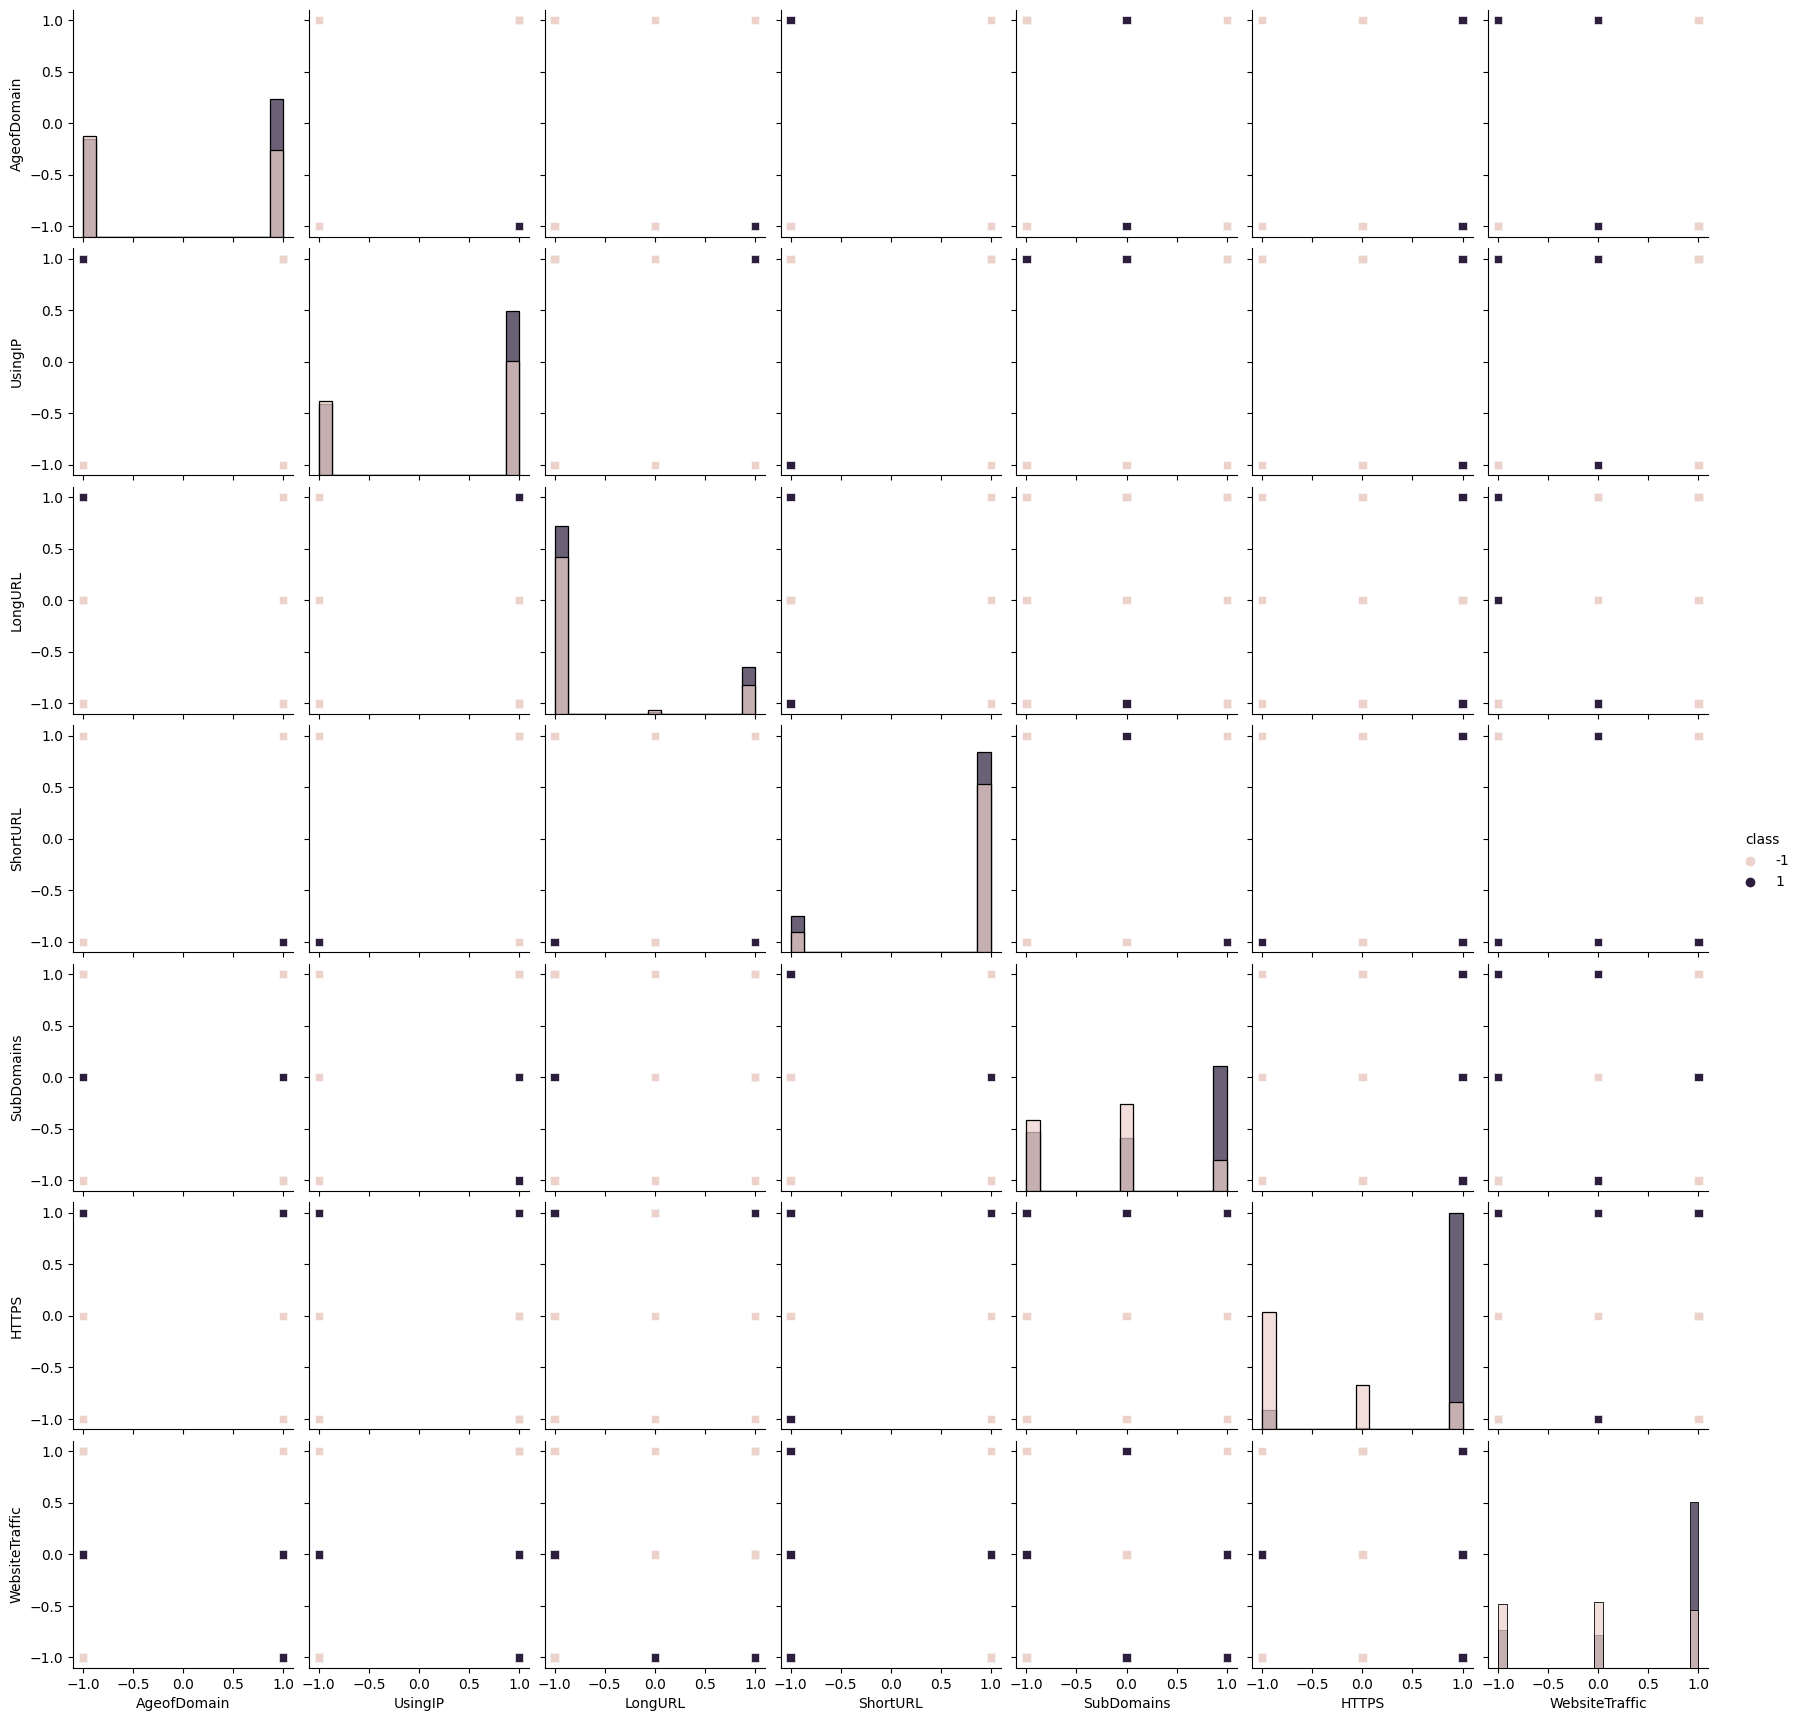

In [ ]:
#Creating a pairplot of the specific features.
features = ['AgeofDomain', 'UsingIP','LongURL','ShortURL','SubDomains', 'HTTPS', 'WebsiteTraffic', 'class']
data_subset = data[features]

sns.pairplot(data_subset, hue='class', diag_kind='hist', diag_kws={'alpha': 0.7}, markers='s')
plt.show()


In [ ]:
columns_of_interest = [ 'LongURL', 'ShortURL','AnchorURL','AbnormalURL']
data_subset = data[columns_of_interest]

# Calculating the correlation matrix
correlation_matrix = data_subset.corr()

# correlation matrix
print(correlation_matrix)

              LongURL  ShortURL  AnchorURL  AbnormalURL
LongURL      1.000000 -0.097976  -0.023153    -0.106347
ShortURL    -0.097976  1.000000   0.000607     0.739573
AnchorURL   -0.023153  0.000607   1.000000    -0.010870
AbnormalURL -0.106347  0.739573  -0.010870     1.000000


Text(0.5, 1.0, 'Phishing Count')

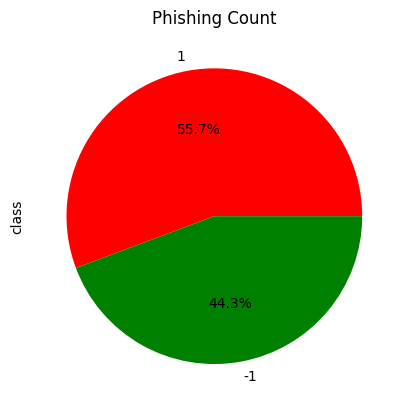

In [ ]:

data['class'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['red','green'])
plt.title("Phishing Count")

In [ ]:
class_counts = data['class'].value_counts()

# Check which value (-1 or 1) represents phishing websites
phishing_value = class_counts.idxmax()

# Check which value (-1 or 1) represents legitimate websites
legitimate_value = class_counts.idxmin()

print("Value for phishing websites: ", phishing_value)
print("Value for legitimate websites: ", legitimate_value)

Value for phishing websites:  1
Value for legitimate websites:  -1


In [ ]:
y = data['class'].values

In [ ]:
print(y)

[-1 -1 -1 ... -1 -1 -1]


In [ ]:
X = data.drop(["class"],axis =1)
y = data["class"]

In [ ]:
# Splitting the data into training and testing data:(70,30)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7737, 30), (7737,), (3317, 30), (3317,))

In [ ]:
#initialize the variables.
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#creating functions to store the results.
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))


 

In [ ]:
# Logistic regression model 

In [ ]:

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

# fitting the model 
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#predicting the value,

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [ ]:
#calculating  the accuracy, f1_score, Recall, precision of the model

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("LR : Accuracy of training dataset: {:.3f}".format(acc_train_log))
print("LR : Accuracy of testing datase: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("LR : f1_score of training dataset: {:.3f}".format(f1_score_train_log))
print("LR : f1_score of testing dataset: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("LR : Recall of training dataset: {:.3f}".format(recall_score_train_log))
print("LR : Recall of testing dataset: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("LR : precision of training dataset: {:.3f}".format(precision_score_train_log))
print("LR : precision of testing dataset: {:.3f}".format(precision_score_test_log))

LR : Accuracy of training dataset: 0.929
LR : Accuracy of testing datase: 0.927

LR : f1_score of training dataset: 0.936
LR : f1_score of testing dataset: 0.936

LR : Recall of training dataset: 0.944
LR : Recall of testing dataset: 0.949

LR : precision of training dataset: 0.929
LR : precision of testing dataset: 0.924


In [ ]:
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.93      0.90      0.92      1455
           1       0.92      0.95      0.94      1862

    accuracy                           0.93      3317
   macro avg       0.93      0.92      0.93      3317
weighted avg       0.93      0.93      0.93      3317



In [ ]:
# store the results.
storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

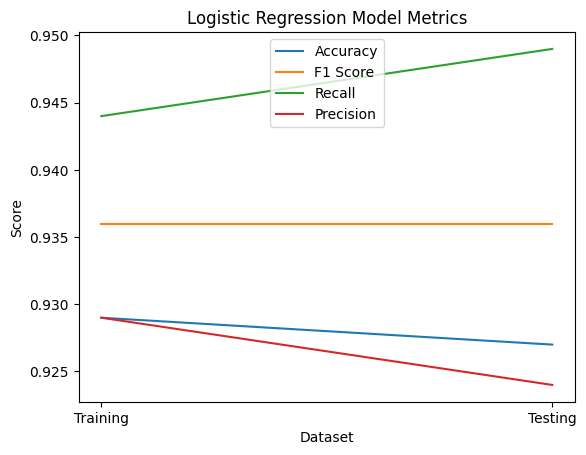

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values
acc_train_log = 0.929
acc_test_log = 0.927

# F1 score values
f1_score_train_log = 0.936
f1_score_test_log = 0.936

# Recall values
recall_score_train_log = 0.944
recall_score_test_log = 0.949

# Precision values
precision_score_train_log = 0.929
precision_score_test_log = 0.924

# Create lists of labels and values for each metric
labels = ['Training', 'Testing']
accuracy_values = [acc_train_log, acc_test_log]
f1_score_values = [f1_score_train_log, f1_score_test_log]
recall_values = [recall_score_train_log, recall_score_test_log]
precision_values = [precision_score_train_log, precision_score_test_log]

# Plot accuracy values
plt.plot(labels, accuracy_values, label='Accuracy')

# Plot F1 score values
plt.plot(labels, f1_score_values, label='F1 Score')

# Plot recall values
plt.plot(labels, recall_values, label='Recall')

# Plot precision values
plt.plot(labels, precision_values, label='Precision')

# Add labels and legend
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.title('Logistic Regression Model Metrics')
plt.legend()

# Show the plot
plt.show()


In [ ]:
#Support Vector Machine Algorithm

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [31]:
# initialize the SVM model
svm = SVC(kernel='linear', C=2000, random_state=42)


In [ ]:
# train the model on the training data
svm.fit(X_train, y_train)
